<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALLMART/EjercicioJeison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

datos originales = (2992, 16)
datos numericos = (2992, 10)
datos numericos sin NaNs = (1946, 10)
varianza explicada acumulada =[ 29.96540273  49.05169354  61.89097376  72.90042761  82.02558791
  89.77789524  95.62396707  98.57335388  99.39559842 100.        ]
Dimensionalidad datos en espacio PCA reducido = (1946, 6)


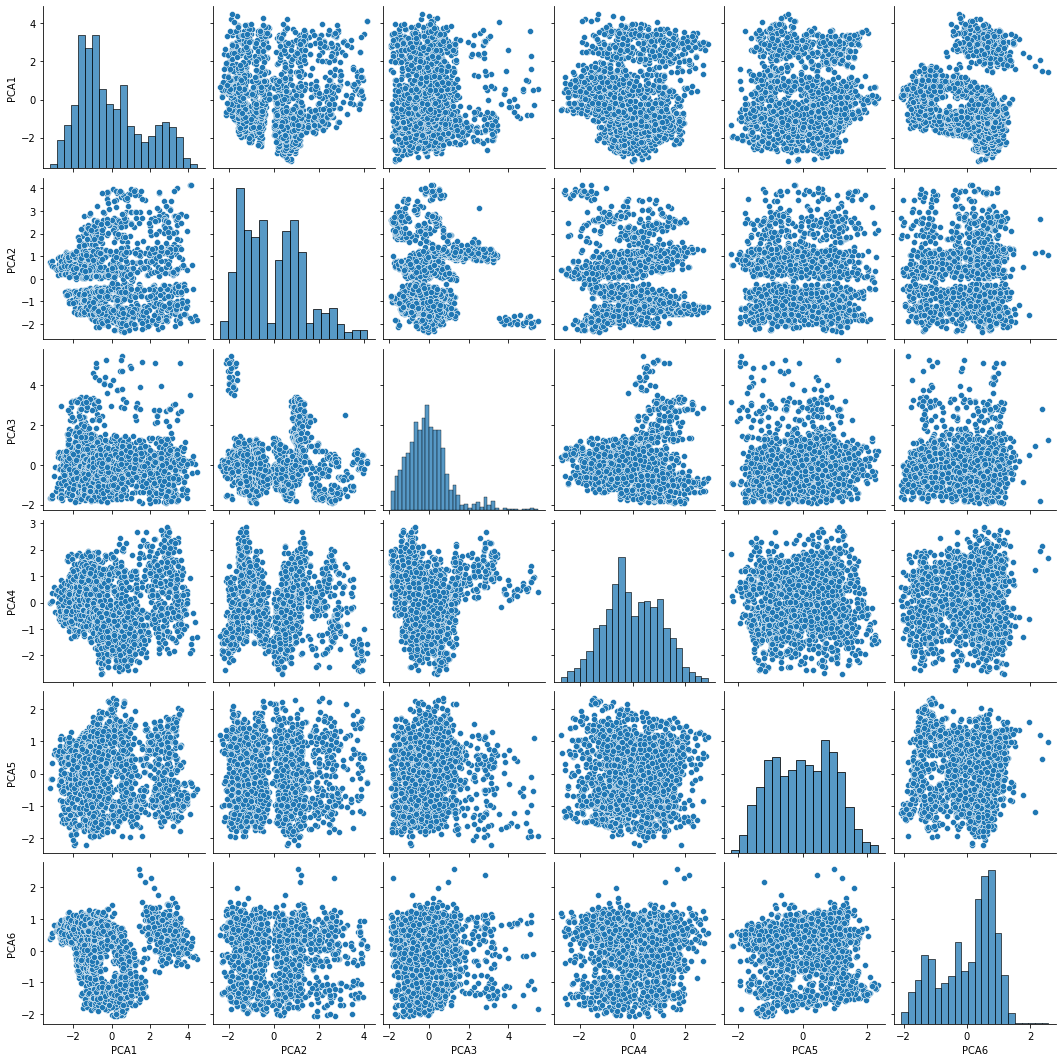

[1 1 1 ... 0 0 0]


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')

df_num = df.select_dtypes(include='number') # keep only numeric variables 
df_num_nonans = df_num.dropna() # remove observations with NaNs

print('datos originales = {}'.format(df.shape))
print('datos numericos = {}'.format(df_num.shape))
print('datos numericos sin NaNs = {}'.format(df_num_nonans.shape))

X = df_num_nonans
y = df['OPENDATE'] # use origin as class label (not needed in PCA)

from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

from sklearn import decomposition
n_variables = df_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 6 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6'])
sns.pairplot(d)
plt.show()




In [37]:
group = KMeans(n_clusters=2).fit_predict(XPCA)
print(group)



[0 0 0 ... 1 1 1]


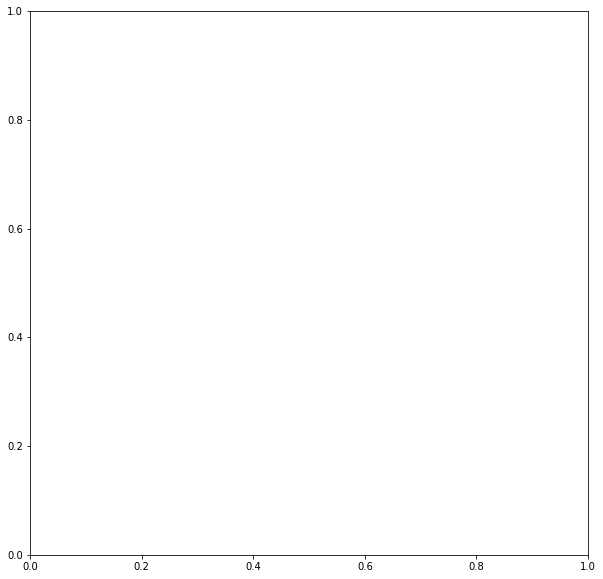

In [30]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df2)
plt.show()